In [1]:
import pandas as pd, os, numpy as np, matplotlib.pyplot as plt

os.chdir(r"C:\Users\Melanie\OneDrive - Rensselaer Polytechnic Institute\Desktop\School\24_Spring\Data Analytics\DA_Project\New Datasets")

# Looking at public investments

In [153]:
pubinv = pd.read_csv("pubinv.csv")

#### Checking out which columns actually have values in them

In [104]:
pubinv_EU.astype(bool).sum(axis=0)

"""We already start to see a problem with lots of zeros."""

Country                                572
Year                                   572
Biogas                                   6
Coal and peat                            4
Concentrated solar power                 5
Fossil fuels n.e.s.                      3
Geothermal energy                        3
Liquid biofuels                          4
Marine energy                            1
Multiple renewables*                    63
Natural gas                              9
Non-renewable municipal waste            1
Nuclear                                  8
Off-grid Solar photovoltaic              3
Offshore wind energy                    21
Oil                                      1
On-grid Solar photovoltaic              23
Onshore wind energy                     69
Other primary solid biofuels n.e.s.     25
Pumped storage                           1
Renewable hydropower                    25
Renewable municipal waste                9
Solar thermal energy                     0
dtype: int6

In [ ]:
pubinv_cols = pubinv_EU.columns
for i in range(2,np.shape(pubinv_EU)[1]):

    print(pubinv_EU[pubinv_EU[pubinv_cols[i]] != 0][["Country","Year",pubinv_cols[i]]])
    print()

#### Grouping the energies into rough types

In [115]:
pubinv_categorized = pubinv_EU[["Country","Year"]]

In [116]:
def add_column(name,columns):
    pubinv_categorized[name] = pubinv_EU[columns].sum(axis=1)

In [117]:
pubinv_EU.columns[2:]

Index(['Biogas', 'Coal and peat', 'Concentrated solar power',
       'Fossil fuels n.e.s.', 'Geothermal energy', 'Liquid biofuels',
       'Marine energy', 'Multiple renewables*', 'Natural gas',
       'Non-renewable municipal waste', 'Nuclear',
       'Off-grid Solar photovoltaic', 'Offshore wind energy', 'Oil',
       'On-grid Solar photovoltaic', 'Onshore wind energy',
       'Other primary solid biofuels n.e.s.', 'Pumped storage',
       'Renewable hydropower', 'Renewable municipal waste',
       'Solar thermal energy'],
      dtype='object')

In [ ]:
add_column("Nonrenewable",["Coal and peat","Fossil fuels n.e.s.","Natural gas","Oil"])
add_column("Wind Energy",["Offshore wind energy","Onshore wind energy"])
add_column("Solar Energy",["Concentrated solar power","Off-grid Solar photovoltaic","On-grid Solar photovoltaic","Solar thermal energy"])
add_column("Hydro Energy",["Marine energy","Pumped storage","Renewable hydropower"])
add_column("Biofuels",["Biogas","Liquid biofuels",'Other primary solid biofuels n.e.s.'])
add_column("Geothermal Energy",["Geothermal energy"])
add_column("Trash Energy",['Non-renewable municipal waste','Renewable municipal waste'])
add_column("Nuclear Energy",["Nuclear"])
add_column("Misc Energy",["Multiple renewables*"])

In [119]:
pubinv_categorized.astype(bool).sum(axis=0)

Country              572
Year                 572
Nonrenewable          17
Wind Energy           90
Solar Energy          30
Hydro Energy          27
Biofuels              34
Geothermal Energy      3
Trash Energy           9
Nuclear Energy         8
Misc Energy           63
dtype: int64

In [ ]:
pubinv_cols = pubinv_categorized.columns
for i in range(2,np.shape(pubinv_categorized)[1]):

    print(pubinv_categorized[pubinv_categorized[pubinv_cols[i]] != 0][["Country","Year",pubinv_cols[i]]])
    print()

#### What if some countries didn't publically put any money into anything?

In [140]:
countries = list(set(pubinv_categorized["Country"]))
country = countries[0]
country

'Latvia'

In [144]:
for country in countries:
    print(country,pubinv_categorized[pubinv_categorized["Country"] == country].iloc[:,2:].astype(bool).sum(axis=0).sum(axis=0))

Latvia 2
Germany 12
Estonia 7
Slovakia 1
Hungary 5
Czechia 3
Slovenia 4
Croatia 16
Greece 10
Romania 9
Bulgaria 9
Malta 1
Spain 27
Sweden 17
Portugal 14
Finland 28
Poland 19
Italy 23
Ireland 5
France 21
Belgium 7
Denmark 11
Cyprus 3
Lithuania 4
Austria 18
Netherlands (Kingdom of the) 5


# welp time to look at import dependency lma

In [19]:
impdep = pd.read_csv("e_import_dependency.csv")

"""Lmfao how can the percent dependency be over 100%??? I'm also going to change the values below zero to zero for my purposes"""
impdep[impdep.columns[2:]] = impdep[impdep.columns[2:]].clip(upper = 100)
impdep.head()

,Country,Year,Solid Fossil Fuels Dependency,Oil and Petroleum (no boifuel) Dependency,Natural Gas Dependency
0,Austria,2000,83.931,89.043,80.582
1,Austria,2001,89.462,89.096,72.177
2,Austria,2002,91.801,93.789,72.239
3,Austria,2003,86.573,93.570,80.219
4,Austria,2004,98.443,94.849,79.901


In [23]:
impdep.columns[2]

'Solid Fossil Fuels Dependency'

#### Plotting the dependency trends over time

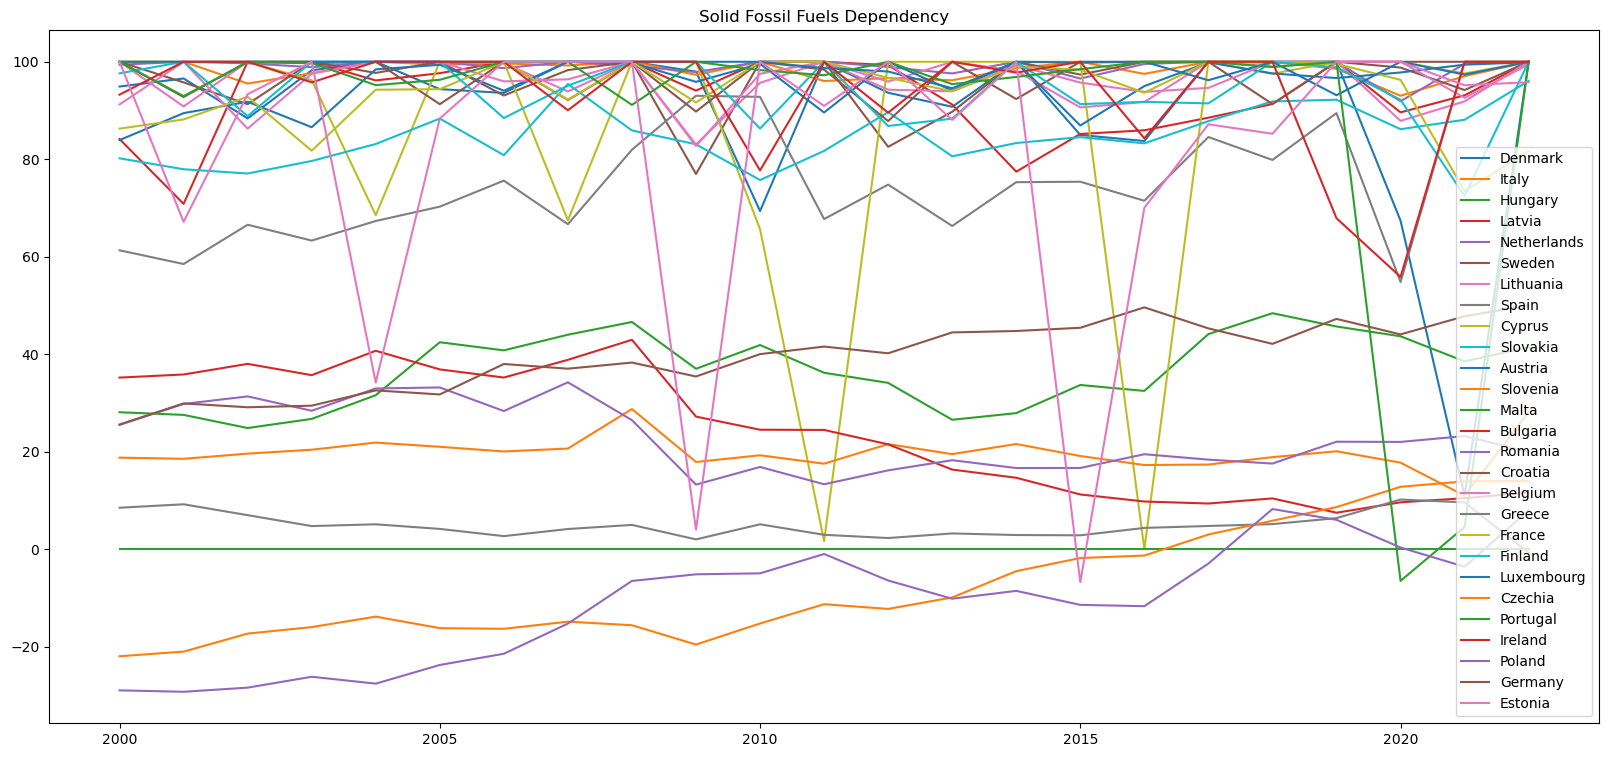

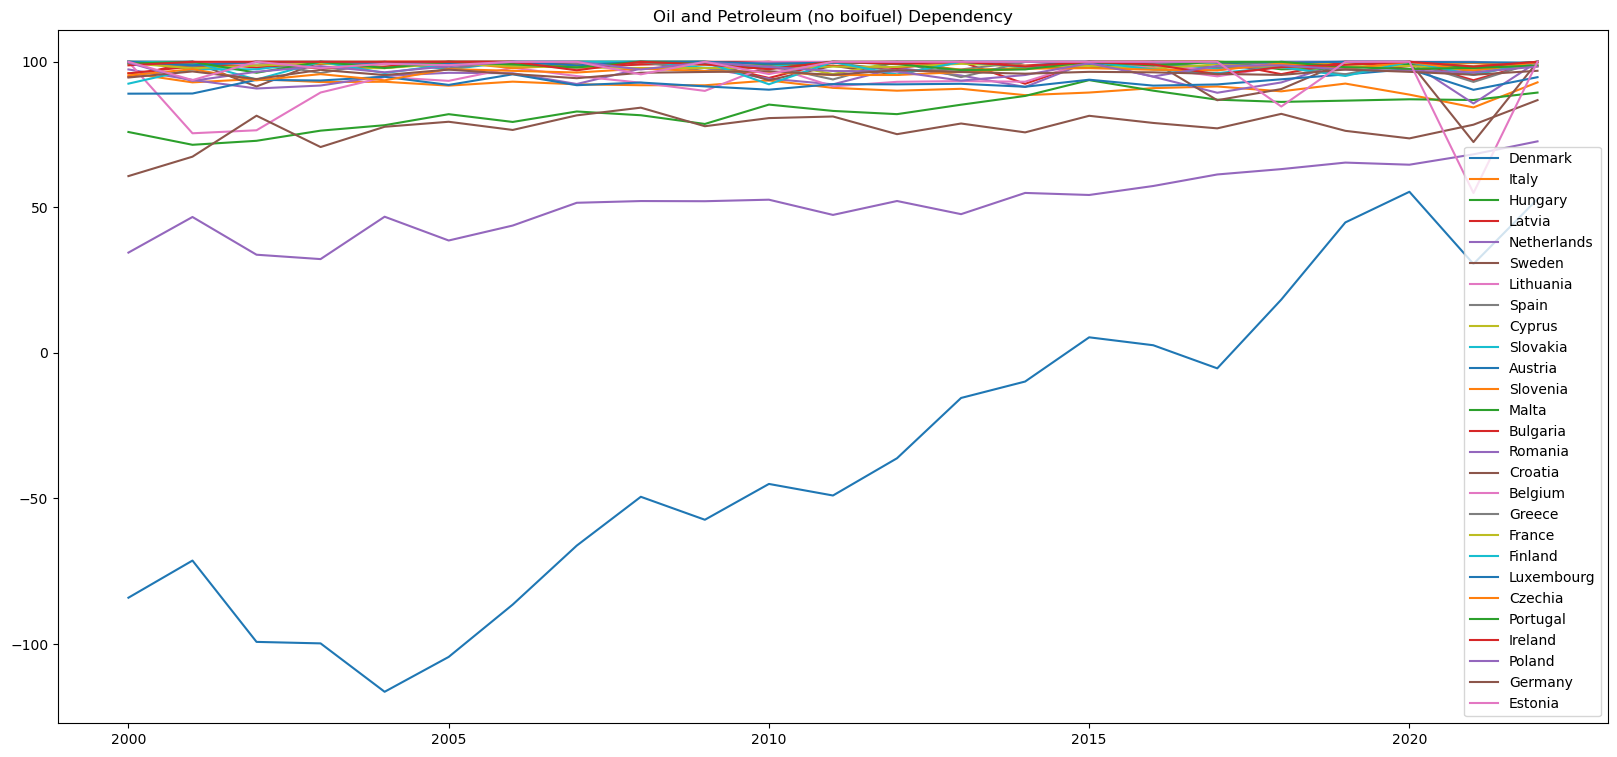

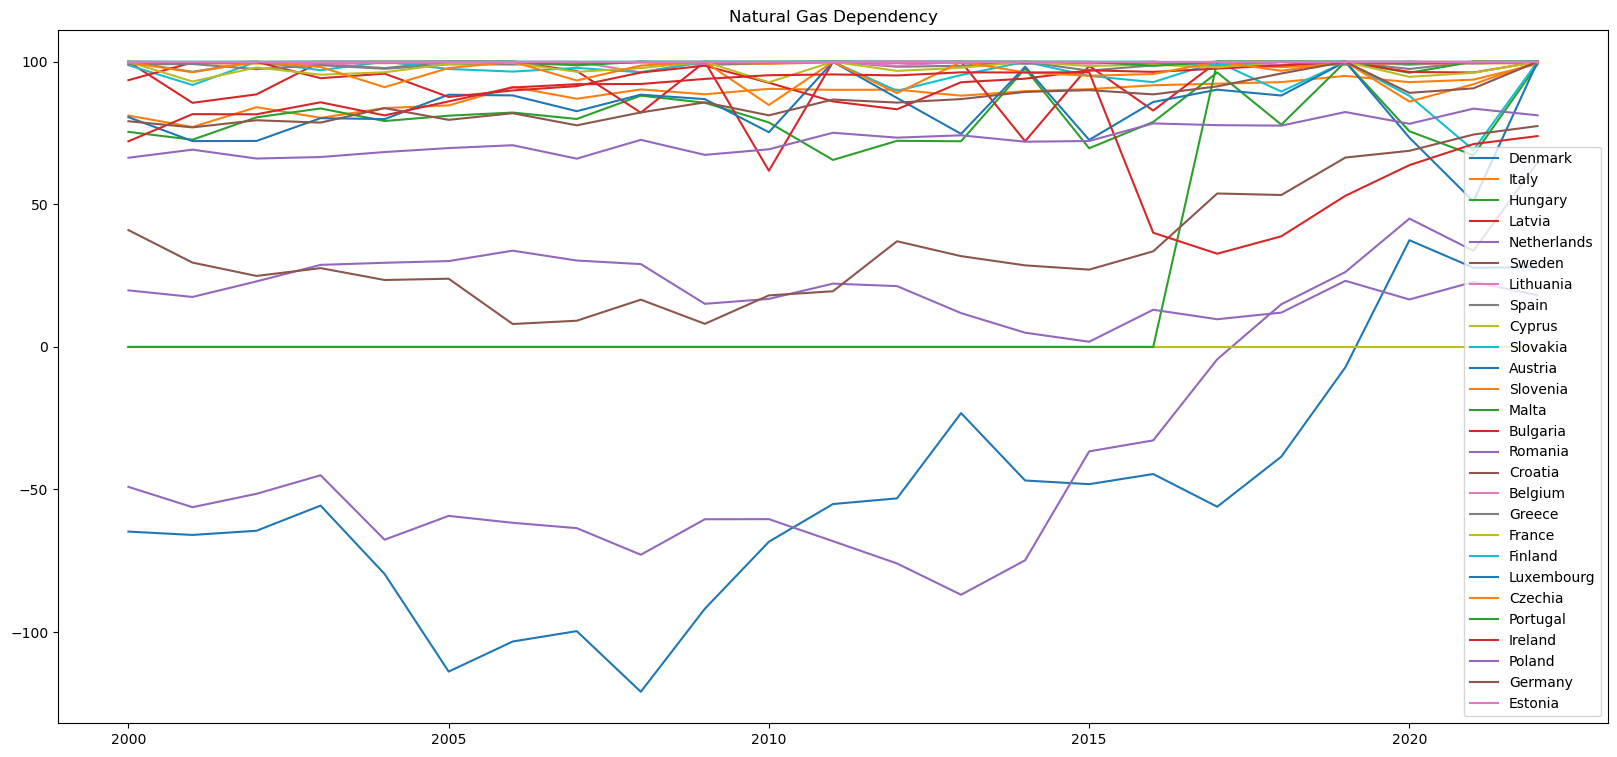

In [24]:
countries = list(set(impdep["Country"]))
for i in range(2,5):
    plt.figure(figsize=(20,9))
    for country in countries:
        country_segment = impdep[impdep["Country"] == country]
        plt.plot(country_segment.iloc[:,1],country_segment.iloc[:,i],label=country)
    plt.legend()
    plt.title(impdep.columns[i])
    plt.savefig(impdep.columns[i]+'.png', dpi=600)

#### Looking at the countries with huge jumps

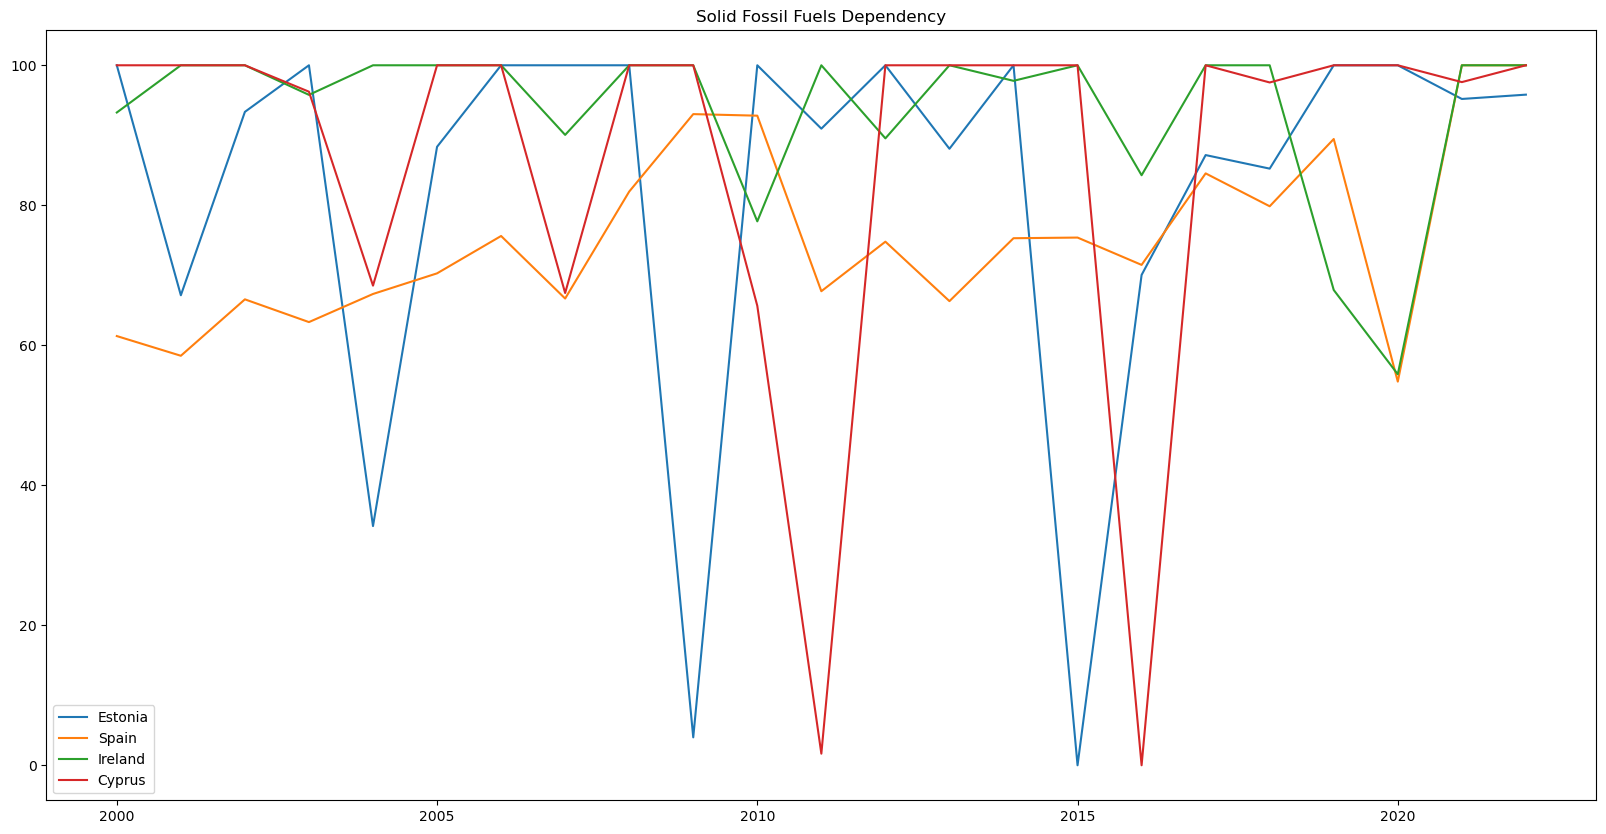

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


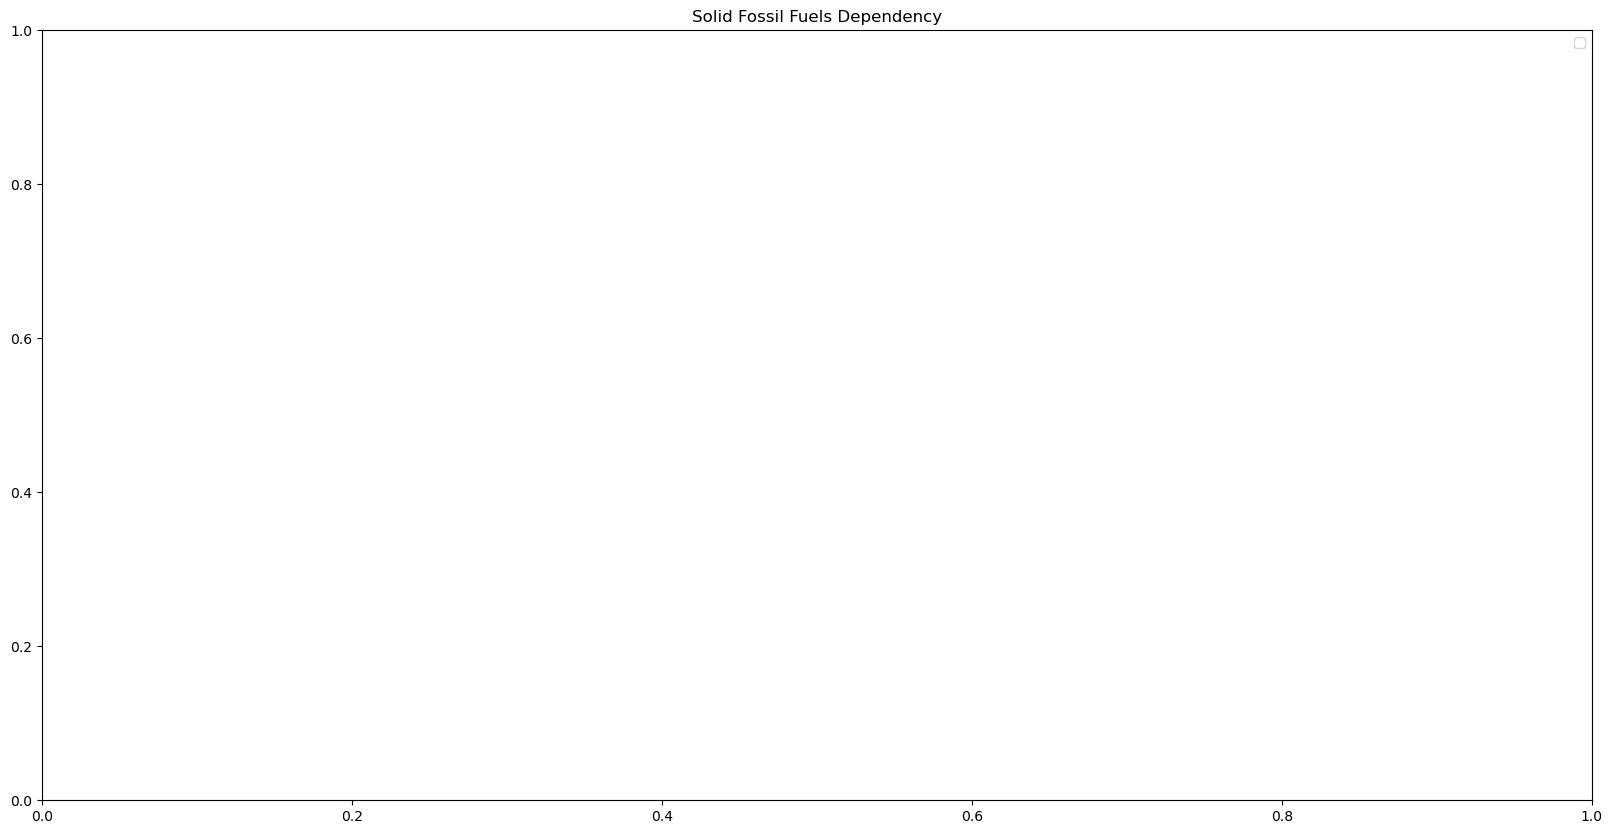

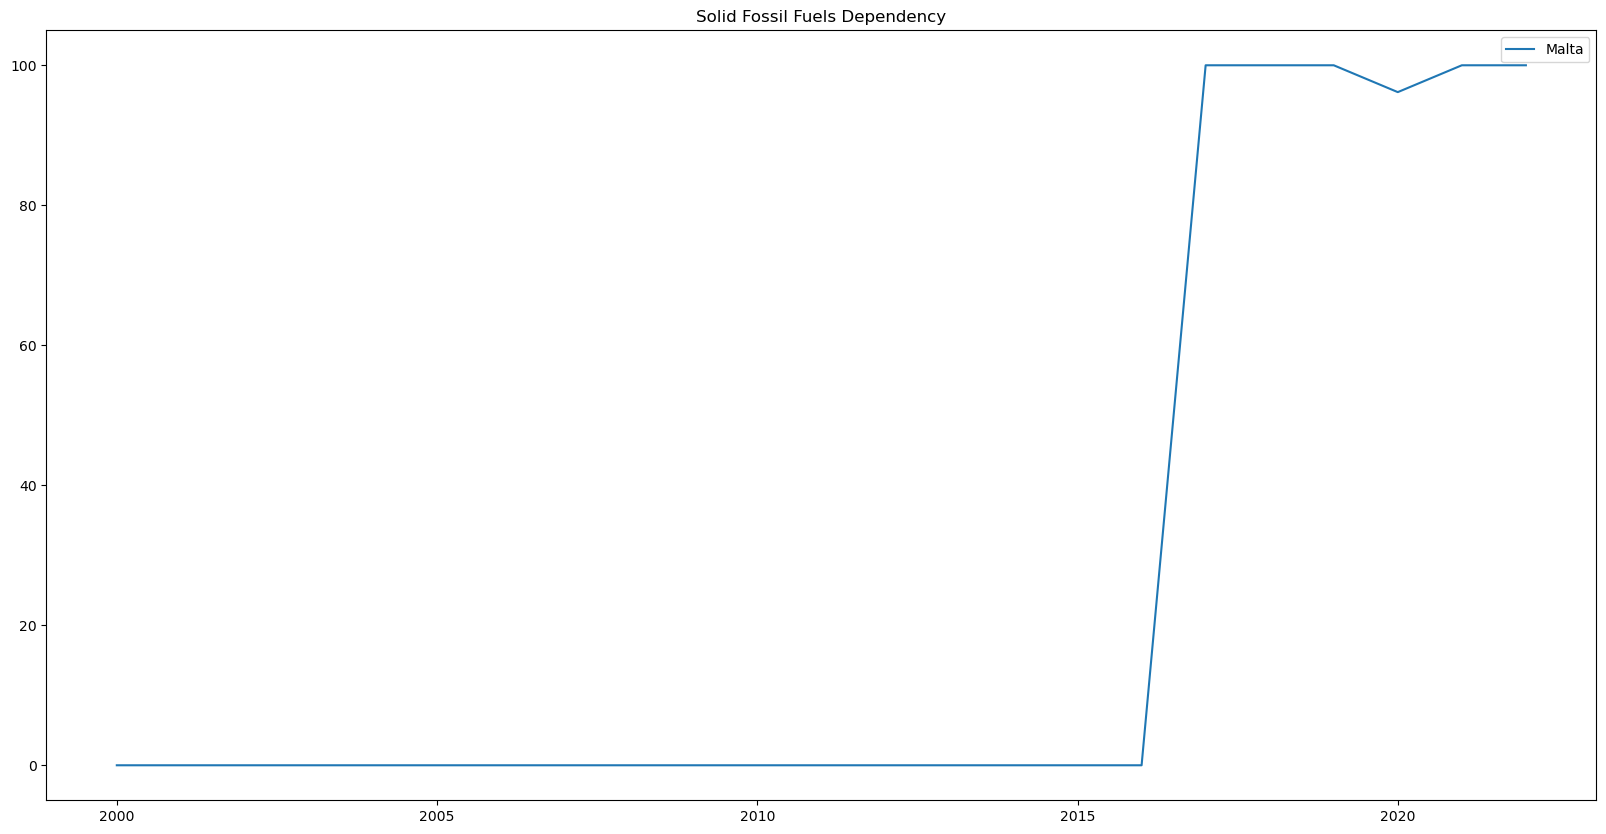

In [248]:
#get the absolute difference over time
impdep_diffs = impdep[impdep.columns[3:]].diff()

plot_derivative = False

for j in range(3):
    plt.figure(figsize = (20,10))
    for country in countries:
        country_segment = impdep[impdep["Country"] == country]
        diff_segment = impdep_diffs.iloc[country_segment["Unnamed: 0"].iloc[1]:country_segment["Unnamed: 0"].iloc[-1],j]
        if max(diff_segment) > 40:
            if plot_derivative:
                plt.plot(country_segment.iloc[1:,2], impdep_diffs.iloc[country_segment["Unnamed: 0"].iloc[0]:country_segment["Unnamed: 0"].iloc[-1],j],label=country)
            else:
                plt.plot(country_segment.iloc[:,2],country_segment.iloc[:,j+3],label=country)
    plt.legend()
    plt.title(impdep_diffs.columns[i])
    plt.show()

#### Looking at the grid capacity

In [249]:
ongrid = pd.read_csv("ongrid_cap.csv")